<a href="https://colab.research.google.com/github/manju-yadav211/The-Sparks-Foundation/blob/master/Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task # 2 - To Explore Supervised Machine Learning 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/student_scores - student_scores.csv')

In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.Hours,df.Scores=np.array(df.Hours), np.array(df.Scores)

In [ ]:
#checking the missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# We see the pie chart by plotting of scores


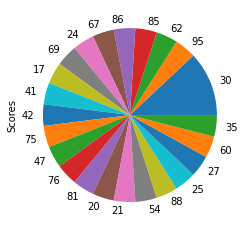

In [ ]:
#plot the pie chart of education categories
df.Scores.value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


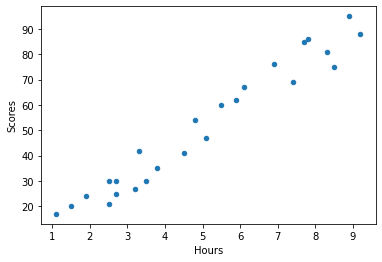

In [ ]:
df.plot.scatter(x='Hours',y='Scores')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


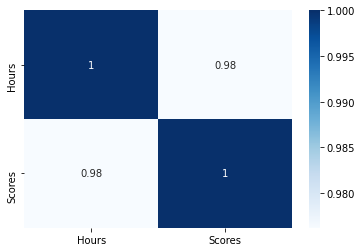

In [ ]:
#just for the fun of it tried making a heatmap
import seaborn as sns
sns.heatmap(df[['Hours','Scores']].corr(),annot=True,cmap='Blues')
plt.show()

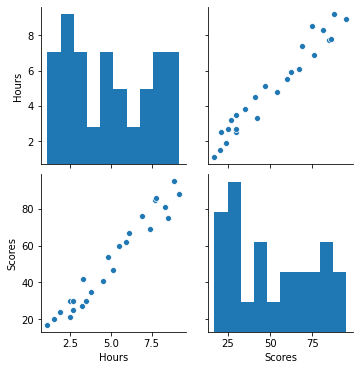

In [ ]:
sns.pairplot(df)
# made a pairplot to check difference

In [ ]:
#We split the dataframe

In [ ]:
X = df.iloc[:, :1].values
y = df.iloc[:, 1].values

Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

#Calling of LinearRegression and fitting the model

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Making Prediction
now that we have trained our algorithm, its time to make some predictions

In [ ]:
print(X_test) #testing data - in hours
y_pred =regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


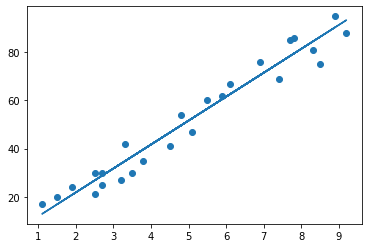

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
#compairing Actual vs Predicted
df =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
#You can test your data
x = (9.25)
own_pred =regressor.predict([[x]])
print("No of Hours = {}".format(x))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


In [ ]:
r_sq=regressor.score(X,y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.9525462098246908


In [ ]:
 print('intercept:', regressor.intercept_)


intercept: 1.9322042531516601


In [ ]:
print('slope:', regressor.coef_)

slope: [9.94167834]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482
